<a href="https://colab.research.google.com/github/Ritu-95/python_code/blob/main/HandleSkewness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np

In [ ]:
# instal Kaggle
!pip install kaggle

In [ ]:
from google.colab  import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rituji","key":"b15f1d3f24d14f94b5ca4875f6ffdd9d"}'}

In [ ]:
#create a kaggle folder
! mkdir ~/.kaggle

In [ ]:
#!mv .kaggle /root/

In [ ]:
# copy the kaggle .json to folder created
! cp kaggle.json ~/.kaggle

In [ ]:
#Permission for thejson to act
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#  To List all datasets in kaggle
! kaggle datasets list

ref                                                  title                                       size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------  -----------------------------------------  -----  -------------------  -------------  ---------  ---------------  
ruchi798/data-science-job-salaries                   Data Science Job Salaries                    7KB  2022-06-15 08:59:12          19071        596  1.0              
jpmiller/employee-attrition-for-healthcare           Employee Attrition for Healthcare           59KB  2022-08-10 22:34:29            370         24  0.9705882        
deepcontractor/mcdonalds-india-menu-nutrition-facts  McDonald's India : Menu Nutrition Dataset    5KB  2022-07-28 17:08:52            952         74  0.9411765        
gpreda/life-expectancy-in-europe-by-age-and-sex      Life Expectancy in Europe by Age and Sex     4MB  2022-08-12 15:28:01            412         24  1.0       

In [ ]:
!kaggle datasets download -d doaaalsenani/usa-cers-dataset

  0% 0.00/65.9k [00:00<?, ?B/s]
100% 65.9k/65.9k [00:00<00:00, 18.3MB/s]


In [ ]:
#creat a directory
!mkdir cars

In [ ]:
#unzip the file to cars
! unzip usa-cers-dataset.zip -d cars

Archive:  usa-cers-dataset.zip
  inflating: cars/USA_cars_datasets.csv  


In [ ]:
# to read the file
% cd /content/cars

/content/cars


In [ ]:
df = pd.read_csv("USA_cars_datasets.csv")
df.head()

In [ ]:
# Removing unnamed: 0 column

df =  df.drop(['Unnamed: 0'],axis = 1)

In [ ]:
df.head()

In [ ]:
#Exploring the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         2499 non-null   int64  
 1   brand         2499 non-null   object 
 2   model         2499 non-null   object 
 3   year          2499 non-null   int64  
 4   title_status  2499 non-null   object 
 5   mileage       2499 non-null   float64
 6   color         2499 non-null   object 
 7   vin           2499 non-null   object 
 8   lot           2499 non-null   int64  
 9   state         2499 non-null   object 
 10  country       2499 non-null   object 
 11  condition     2499 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 234.4+ KB


In [ ]:
# check count of rows n coluns
df.shape

(2499, 12)

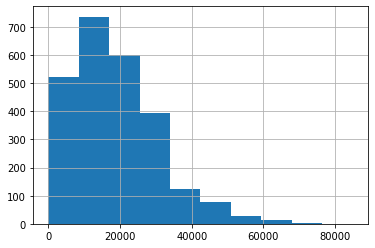

In [ ]:
# importing library for visualizing dataset and plotting the histogram fro price attributes

import seaborn as sns

#df['price'].hist(grid = False)
df['price'].hist(grid = True)

In [ ]:
# to check skew
df['price'].skew()

0.9227307836499805

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


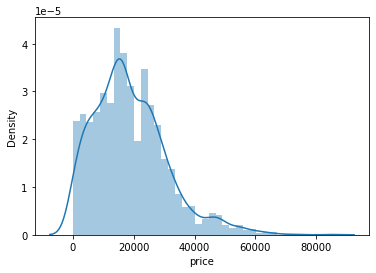

In [ ]:
# density plot
sns.distplot(df['price'],hist = True)

Note : As we can see the skewed values lies between 0.5 to 1 range. so , data is moderately skewed and right skewed.


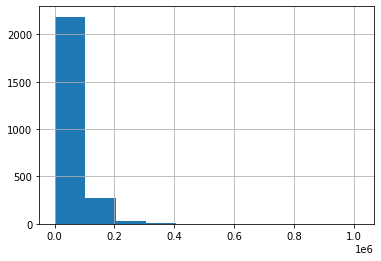

In [ ]:
# checking skew for milage
df['mileage'].hist(grid = True)

In [ ]:
df['mileage'].skew()

7.0793210165347915

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


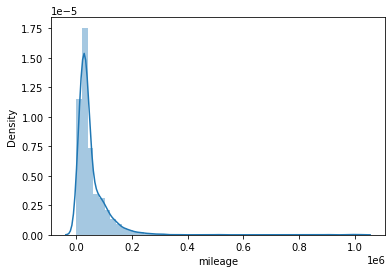

In [ ]:
# density plot for milage
sns.distplot(df['mileage'],hist = True)

Note : As we can see the skewed value lies between -1 and greater than +1 , then the data is heavily skewed.
so, data is heavily right skewed for df['milage'].


In [ ]:
# Lets Handle the skewed data
# We do by TRANSFORMATION
#Transformation is a replacement that changes the shape of distribution or relationship.
#In Data Analysis tranformation is the replacement of a variable by a function of that variable: replacing a varible x by the square root of x or logarithm of x. 
# Lets try Log Tansformation using numpy

log_mileage = np.log(df['mileage'])
log_mileage.head(5)


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0    12.521310
1    12.157680
2    10.586332
3    11.068917
4     8.802973
Name: mileage, dtype: float64

In [ ]:
#  checking the Skewness after the log-transformation
log_mileage.skew()

nan

We get nan because there are some values as the zero. In log transformation, it deals with only the +ve and -ve numbers , not with zero.
The log is the range in between -Infinity to + infinity but greater or less than Zero.
If getting zeros inside the data, refer to root Transformation.


In [ ]:
#The Square root means x to x^(1/2) = sqrt(X) , it is a transformation with a moderate effect on distribution shape.ModuleNotFoundError
# it is weaker than logarithm and the cube root.



Root Tranformation is used for right skewness and has advantage that it can be applied to zero values.

Note that he square root of an area has the units of a length. It is commonly applied to counted data, especially if the values are mostly rather small.

In [ ]:
from numpy.ma.core import sqrt
# calculating the square root for the  mileage column
sqrt_mileage = np.sqrt(df ['mileage'])
sqrt_mileage.head(5)

0    523.561840
1    436.522623
2    198.972360
3    253.270606
4     81.572054
Name: mileage, dtype: float64

In [ ]:
# calculating skewness after calculating the square root .
# we can see the change in the value
sqrt_mileage.skew()

1.6676282633339148

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


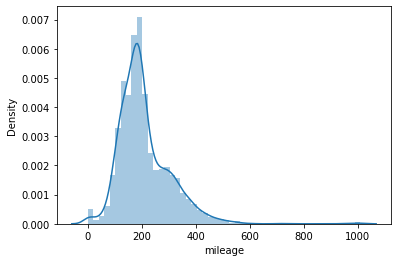

In [ ]:
# Visualising by density plot
sns.distplot(sqrt_mileage,hist = True)

Note : In the previous case, we got the nan because of zero, but the square root transformation has reduced the skewed value from 7.07 to 1.66. Which is near to zero compared to 7.07.

Cube Root Transformation

Cube root means x to x^(1/3).
This is a fairly strong transformation with a substantial effect on distribution shape.
It is weaker than the logaritm but stronger than the square root transformation.
It is also used for reducing right skewness and has the advantage that it can be applied to zero and negative values.
Cube root of a volume has the units of a lenth.
It is commonly applied to rainfall data.

In [ ]:
# calculating the cube for the column
cube_root_mileage = np.cbrt(df ['mileage'])
cube_root_mileage .head(5)

0    64.959896
1    57.544590
2    34.082269
3    40.030394
4    18.808793
Name: mileage, dtype: float64

In [ ]:
# calculating skewness after calculating the cube root .
# we can see the change in the value
cube_root_mileage.skew()

0.6866069687334176

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


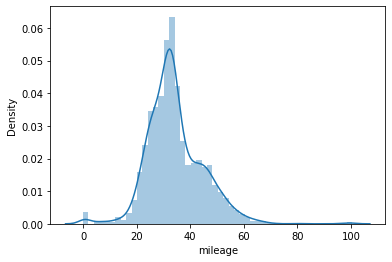

In [ ]:
# Visualising by density plot of cube _root_mileage
sns.distplot(cube_root_mileage,hist = True)

Forth Type is Reciprocals Transformation

The reciprocal ,x to 1/x , with its sibling the negative reciprocal , x to 1/x, is a very strong transformation with a drastic effect on distribution shape.

It cannot be applied to zero values . Although it can be applied to the negative values, it is not usefull unless all values are positive.


In [ ]:
# calculating the reciprocal for the column mileage

recipr_mileage = np.reciprocal(df['mileage'])
recipr_mileage.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in reciprocal
  result = getattr(ufunc, method)(*inputs, **kwargs)


0    0.000004
1    0.000005
2    0.000025
3    0.000016
4    0.000150
Name: mileage, dtype: float64

In [ ]:
recipr_mileage.skew()

nan

It is giving output as nan because there are some values as the zero. 
In reciprocal transformation, It is good to deal with negative numbers , not with zero.

**LEFT SKEWNESS**



In [6]:
# Let's create small dataset & have a  look on left Skewwness
Data = [['sameer',10],['Pankaj',20],['Sam',30],['Hemant',48],['Vivek',62],['ram',87],['Sauman',89],['Yash',90],
        ['Sam',99],['Deepak,92'],['Vikas',99],['Rajiv',95],['Jim',94],['Sid',98]]

# converting in datafram
df = pd.DataFrame(Data, columns = ['Name', 'Marks'])
df.head(5)
        


,Name,Marks
0,sameer,10.0
1,Pankaj,20.0
2,Sam,30.0
3,Hemant,48.0
4,Vivek,62.0


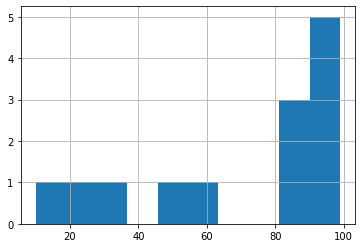

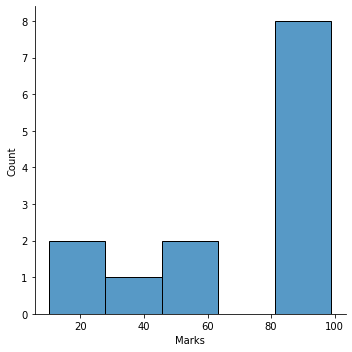

In [7]:
# ploting the Density & histogram plot
import seaborn as sns
df['Marks'].hist(grid = True)
sns.displot(df['Marks'])
#sns.distplot(df['price'],hist = True)

In [8]:
df['Marks'].skew()

-0.9136588057424061

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


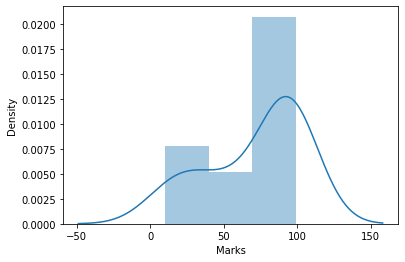

In [9]:
sns.distplot(df['Marks'],hist = True)

if the skewness is less than -1 and greater than +1 then our data is heavily skewed. Data for Marks is left skewed here, the skewed value is less than -1. 
Lets try to make it symmetric.

In [2]:
#SQuares Transformation

#The square, x to x^2, has a moderate effect on distribution shape and it could be used to reduce left skewness.

#Squaring usually makes sense only if the variable concerned is zero or +ve, given that (-x)^2  and x^2 are identical.



In [10]:
# calculating the square for column df['Marks']

Square_marks = np.square(df['Marks'])
Square_marks.head(5)

0     100.0
1     400.0
2     900.0
3    2304.0
4    3844.0
Name: Marks, dtype: float64

In [14]:
Square_marks.skew()

-0.6017492681822537

In [15]:
# calculating the cube for column df['Marks']

cube_marks = np.power(df['Marks'],3)
cube_marks.head(5)


0      1000.0
1      8000.0
2     27000.0
3    110592.0
4    238328.0
Name: Marks, dtype: float64

In [16]:
cube_marks.skew()

-0.41620314917519724

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


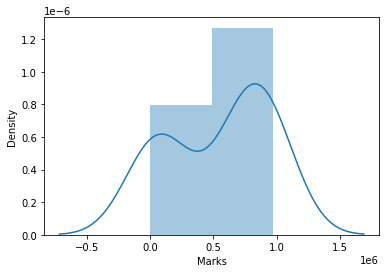

In [18]:
#plotting the density and histogram plot

sns.distplot(cube_marks,hist = True)

In [ ]:
#note : After applying the cube transformation , 
#the skewed value is -0.4, and if the skewed value 
#lies in between -1 to 0.5 then data is moderately skewed.and

Higher Power

When simple transformation like square and cubes doesn't reduce the skewness in the data distribution, we can use higher powers to transform to data. It is only useful in the left skewness.






In [19]:
higher_power_4 = np.power(df['Marks'],4)
higher_power_4.head(5)

0       10000.0
1      160000.0
2      810000.0
3     5308416.0
4    14776336.0
Name: Marks, dtype: float64

In [20]:
higher_power_4.skew()

-0.2725048100833019

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


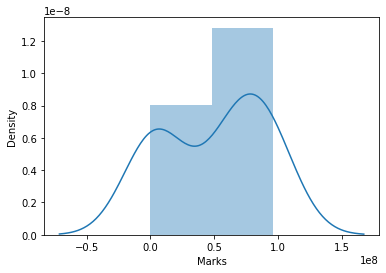

In [22]:
sns.distplot(higher_power_4,hist = True)

After applying the higher power(power =4) the skewness is changed from -0.9 to -0.2.
if the skewness is between -0.5 to +0.5 then we can say data is fairly symmetrical.So,finally we have got the best result and we got the skew value as -0.2.
In case if we would not have got this value still after applying these many powers, we can increase the power to get a better result.